In [1]:
import gdown

gdown.download_folder("https://drive.google.com/drive/folders/19DLS6ZrfsxVq4IrRycPKrtt1TQanV9Em?usp=sharing", quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1tswGuA4JAO_fX8yQKlUTZoaXvHpeYnp8 meta_train.csv
Processing file 1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX test_images.zip
Processing file 1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2 train_images.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1tswGuA4JAO_fX8yQKlUTZoaXvHpeYnp8
To: /content/data/meta_train.csv
100%|██████████| 335k/335k [00:00<00:00, 8.76MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX
From (redirected): https://drive.google.com/uc?id=1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX&confirm=t&uuid=b55c0f18-97ed-4f5f-ab22-e53475fcb0b9
To: /content/data/test_images.zip
100%|██████████| 274M/274M [00:01<00:00, 137MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2
From (redirected): https://drive.google.com/uc?id=1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2&confirm=t&uuid=4dd7a6c5-d142-4f92-b349-accee146f7f8
To: /content/data/train_images.zip
100%|██████████| 820M/820M [00:09<00:00, 86.6MB/s]
Download completed


['/content/data/meta_train.csv',
 '/content/data/test_images.zip',
 '/content/data/train_images.zip']

In [2]:
import zipfile
with zipfile.ZipFile('data/test_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [3]:
import tensorflow as tf
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'data/test_images',
    labels=None,                  # No labels needed for prediction
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 3469 files.


In [4]:
# Import final model for prediction testing
from tensorflow.keras.models import load_model

final_Xception_model_task_2 = load_model("final_Xception_model_task_2.keras")
final_MobileNet_model_task1 = load_model("final_EfficientNetB0_model_task_1.keras")
final_MobileNet_model_task3 = load_model("final_MobileNet_model_task_3.keras")

In [ ]:
import os
import numpy as np
import pandas as pd
# Extract image file names from dataset
file_paths = test_dataset.file_paths
image_ids = [os.path.basename(path) for path in file_paths]
# Step 3: Make predictions
label_preds = final_MobileNet_model_task1.predict(test_dataset)
variety_preds = final_Xception_model_task_2.predict(test_dataset)
age_preds = final_MobileNet_model_task3.predict(test_dataset)

# Step 4: Decode predictions to class names
label_classes = [
    "bacterial_leaf_blight",
    "bacterial_leaf_streak",
    "bacterial_panicle_blight",
    "blast",
    "brown_spot",
    "dead_heart",
    "downy_mildew",
    "hispa",
    "normal",
    "tungro"
]
variety_classes = [
    "ADT45",
    "AndraPonni",
    "AtchayaPonni",
    "IR20",
    "KarnatakaPonni",
    "Onthanel",
    "Ponni",
    "RR",
    "Surya",
    "Zonal"
]

# Get predicted class names
predicted_labels = [label_classes[np.argmax(pred)] for pred in label_preds]
predicted_varieties = [variety_classes[np.argmax(pred)] for pred in variety_preds]
predicted_ages = [int(round(age[0])) for age in age_preds]  # age is usually a regression output

# Step 5: Create DataFrame
df = pd.DataFrame({
    'image_id': image_ids,
    'label': predicted_labels,
    'variety': predicted_varieties,
    'age': predicted_ages
})

# Step 6: Save to CSV
df.to_csv('COSC2753_A2_S2_G1.csv', index=False)
print("COSC2753_A2_S2_G1.csv created successfully.")

109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step
submission.csv created successfully.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('COSC2753_A2_S2_G1.csv')

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  3469 non-null   object
 1   label     3469 non-null   object
 2   variety   3469 non-null   object
 3   age       3469 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 108.5+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'hispa'),
  Text(1, 0, 'normal'),
  Text(2, 0, 'blast'),
  Text(3, 0, 'brown_spot'),
  Text(4, 0, 'dead_heart'),
  Text(5, 0, 'tungro'),
  Text(6, 0, 'bacterial_leaf_blight'),
  Text(7, 0, 'bacterial_leaf_streak'),
  Text(8, 0, 'bacterial_panicle_blight'),
  Text(9, 0, 'downy_mildew')])

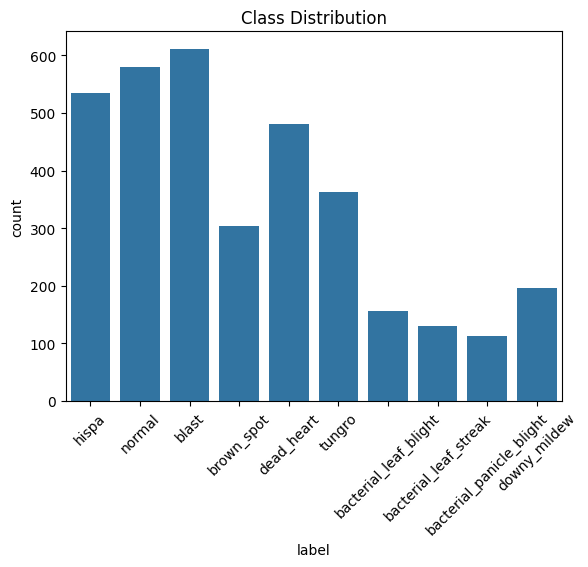

In [8]:
import seaborn as sns
# Label feature distribution graph
sns.countplot(data=data, x='label')
plt.title("Class Distribution")
plt.xticks(rotation=45)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ADT45'),
  Text(1, 0, 'Zonal'),
  Text(2, 0, 'AndraPonni'),
  Text(3, 0, 'KarnatakaPonni'),
  Text(4, 0, 'Ponni'),
  Text(5, 0, 'IR20'),
  Text(6, 0, 'AtchayaPonni'),
  Text(7, 0, 'Onthanel'),
  Text(8, 0, 'RR'),
  Text(9, 0, 'Surya')])

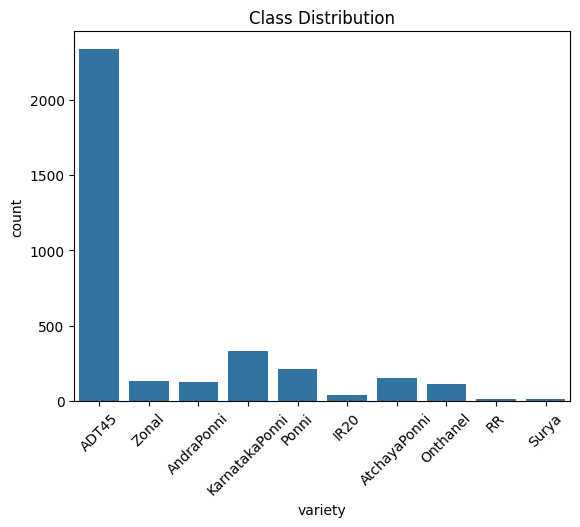

In [9]:
import seaborn as sns
# Label feature distribution graph
sns.countplot(data=data, x='variety')
plt.title("Class Distribution")
plt.xticks(rotation=45)

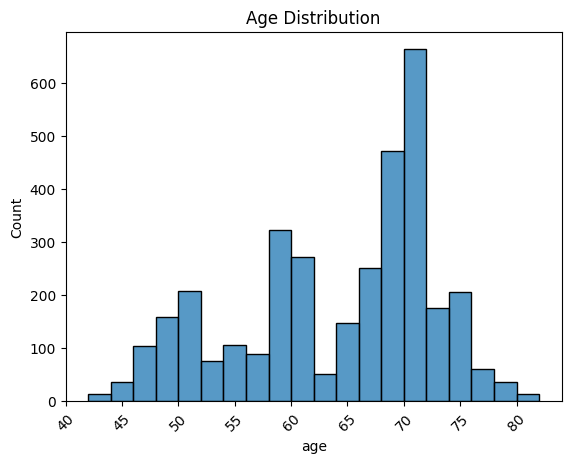

In [10]:
import seaborn as sns
sns.histplot(data=data, x='age', bins=20)
plt.title("Age Distribution")
plt.xticks(rotation=45)
plt.show()